In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [4]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_C_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,NaN,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,NaN,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [5]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	17
float64		column 2	16
float64		column 3	16
float64		column 4	11
float64		column 5	18
float64		column 6	14
float64		column 7	14
float64		column 8	12


In [6]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1467.000000,1468.000000,1468.000000,1473.000000,1466.000000,1470.000000,1470.000000,1472.000000
mean,0.500763,0.499469,0.500320,0.261073,0.504775,0.007571,0.499980,0.276433
std,0.137418,0.124080,0.086641,0.137100,0.048644,0.076039,0.057772,0.106709
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

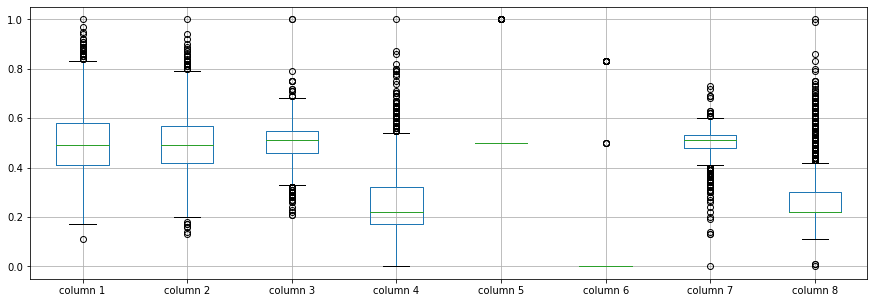

In [7]:
df.boxplot(return_type='axes', figsize=(15,5))

In [8]:
df.mean()

column 1    0.500763
column 2    0.499469
column 3    0.500320
column 4    0.261073
column 5    0.504775
column 6    0.007571
column 7    0.499980
column 8    0.276433
dtype: float64

In [9]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.583442,-0.163345,0.161544,0.065180,0.005123,0.075049,-0.120883
column 2,0.583442,1.000000,-0.274006,0.140472,0.061686,0.000442,0.091080,-0.104360
column 3,-0.163345,-0.274006,1.000000,0.063501,-0.008357,0.006374,-0.193489,-0.025462
column 4,0.161544,0.140472,0.063501,1.000000,-0.005293,-0.008522,-0.100182,-0.054449
column 5,0.065180,0.061686,-0.008357,-0.005293,1.000000,-0.009883,0.044085,0.002804
column 6,0.005123,0.000442,0.006374,-0.008522,-0.009883,1.000000,0.021179,-0.036147
column 7,0.075049,0.091080,-0.193489,-0.100182,0.044085,0.021179,1.000000,0.087695
column 8,-0.120883,-0.104360,-0.025462,-0.054449,0.002804,-0.036147,0.087695,1.000000


In [10]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [11]:
imputer = md.Midas(layer_structure = [8,8+20,8+20+20,8+20+20+20,8+20+20+20+20,8+20+20+20+20+20,8+20+20+20+20+20+20,8+20+20+20+20+20,8+20+20+20+20,8+20+20+20,8+20+20,8+20,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 3.0150713531867317
Epoch: 1 , loss: 2.5972512753113457
Epoch: 2 , loss: 2.337693831195002
Epoch: 3 , loss: 2.1951284395611803
Epoch: 4 , loss: 2.0469288515008013
Epoch: 5 , loss: 1.9524653087491575
Epoch: 6 , loss: 1.8570062958675881
Epoch: 7 , loss: 1.7725993239361306
Epoch: 8 , loss: 1.6715400206006092
Epoch: 9 , loss: 1.6388972479364146
Epoch: 10 , loss: 1.5728898333466572
Epoch: 11 , loss: 1.5326725270437158
Epoch: 12 , loss: 1.4928020770135133
Epoch: 13 , loss: 1.4395825357540795
Epoch: 14 , loss: 1.4199554570343182
Epoch: 15 , loss: 1.3899087698563286
Epoch: 16 , loss: 1.3470661121865977
Epoch: 17 , loss: 1.3520384884398917
Epoch: 18 , loss: 1.3118129890898
Epoch: 19 , loss: 1.285055596543395
Epoch: 20 , loss: 1.2721675841704658
Epoch: 21 , loss: 1.269943421949511
Epoch: 22 , loss: 1.2564779403417006
Epoch: 23 , loss: 1.218730263735937
Epoch: 24 , loss: 1.2189502009878987
Epoch: 25 , loss: 1.19316

In [12]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [13]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [14]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [15]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,-0.000332,0.0,0.0
...,...,...,...,...,...,...,...,...
1479,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1480,0.104297,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1481,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1482,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


Calculating NRMSE Value

In [16]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [17]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [18]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1.5768774847250582, 46.90414374018569)

In [19]:
NRMS=numerator/denominator
NRMS


0.03361915086777396

In [20]:
new_df.iloc[66,:]

column 1    0.46
column 2    0.49
column 3    0.58
column 4    0.23
column 5    0.50
column 6    0.00
column 7    0.44
column 8    0.22
Name: 66, dtype: float64

In [21]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.580000,0.61,0.47,0.13,0.5,0.000000,0.48,0.22
1,0.430000,0.67,0.48,0.27,0.5,0.000000,0.53,0.22
2,0.640000,0.62,0.49,0.15,0.5,0.000000,0.53,0.22
3,0.580000,0.44,0.57,0.13,0.5,0.000000,0.54,0.22
4,0.420000,0.44,0.48,0.54,0.5,-0.000332,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.820000,0.63,0.47,0.18,0.5,0.000000,0.50,0.22
1480,0.454297,0.29,0.46,0.14,0.5,0.000000,0.54,0.66
1481,0.410000,0.47,0.50,0.14,0.5,0.000000,0.53,0.37
1482,0.510000,0.45,0.62,0.25,0.5,0.000000,0.59,0.22


In [23]:
imputations[-1].to_excel("Yeast_C_1(imp).xlsx", index=False, header=False)